Offline handwriting recognition is the process of automatically converting text in an image of handwritten notes or pages into computer-usable letter codes. It is called "offline" because it deals with handwritten text on physical surfaces, such as paper, rather than text created digitally using tools like a stylus or an Apple Pencil. In contrast, online text recognition refers to the process of recognizing digital text in real-time as it is being generated by a stylus or other digital input device.

In [1]:
import numpy as np
import pandas as pd

import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


In [2]:


dir = "Train/"
train_data = []
img_size = 32
non_chars = ["#", "$", "&", "@"]

for label in os.listdir(dir):
    if label in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir, label)
    for filename in os.listdir(sub_directory):
        if count >= 4000:
            break
        img_path = os.path.join(sub_directory, filename)
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (img_size, img_size))
        train_data.append([img, label])
        count += 1


In [3]:
len(train_data)


140000

In [4]:

val_dir = "Validation/"
val_data = []
img_size = 32
non_chars = ["#", "$", "&", "@"]

for label in os.listdir(val_dir):
    if label in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir, label)
    for filename in os.listdir(sub_directory):
        if count >= 1000:
            break
        img_path = os.path.join(sub_directory, filename)
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (img_size, img_size))
        val_data.append([img, label])
        count += 1


In [5]:
len(val_data)


15209

In [6]:
random.shuffle(train_data)
random.shuffle(val_data)


In [7]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)


In [8]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)


In [9]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)


In [10]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)


In [11]:
print(train_X.shape,val_X.shape)


(140000, 32, 32, 1) (15209, 32, 32, 1)


In [12]:
print(train_Y.shape,val_Y.shape)


(140000, 35) (15209, 35)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel, "same" padding, and ReLU activation
# Input shape is (32, 32, 1)
model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 1)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer with rate 0.25
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add another dropout layer with rate 0.2
model.add(Dropout(0.2))

# Add a fully connected layer with 35 units and softmax activation
model.add(Dense(35, activation='softmax'))


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [15]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


In [16]:
history = model.fit(train_X,train_Y, epochs=15, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)


Epoch 1/15
4375/4375 [==============================] - 110s 25ms/step - loss: 0.5327 - accuracy: 0.8267 - val_loss: 0.6919 - val_accuracy: 0.8435
Epoch 2/15
4375/4375 [==============================] - 107s 25ms/step - loss: 0.2968 - accuracy: 0.8953 - val_loss: 0.6106 - val_accuracy: 0.8753
Epoch 3/15
4375/4375 [==============================] - 108s 25ms/step - loss: 0.2567 - accuracy: 0.9065 - val_loss: 0.6734 - val_accuracy: 0.8590
Epoch 4/15
4375/4375 [==============================] - 109s 25ms/step - loss: 0.2363 - accuracy: 0.9135 - val_loss: 0.6782 - val_accuracy: 0.8732
Epoch 5/15
4375/4375 [==============================] - 108s 25ms/step - loss: 0.2218 - accuracy: 0.9185 - val_loss: 0.6979 - val_accuracy: 0.8593
Epoch 6/15
4375/4375 [==============================] - 109s 25ms/step - loss: 0.2104 - accuracy: 0.9209 - val_loss: 0.6885 - val_accuracy: 0.8709
Epoch 7/15
4375/4375 [==============================] - 110s 25ms/step - loss: 0.2021 - accuracy: 0.9243 - val_loss: 0

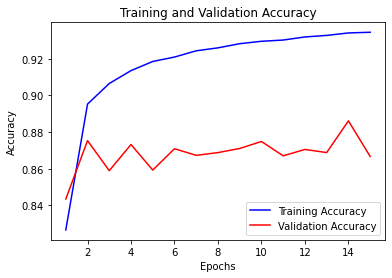

In [17]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


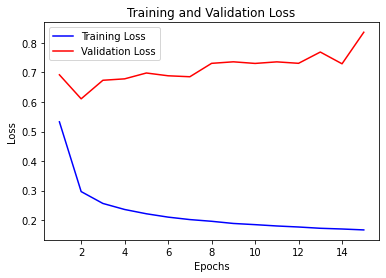

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


In [20]:
def get_letters(img_path, model, LB):
    letters = []
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = gray[y:y + h, x:x + w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_CUBIC)
            thresh = thresh.astype("float32") / 255.0
            thresh = np.expand_dims(thresh, axis=-1)
            thresh = thresh.reshape(1, 32, 32, 1)
            y_pred = model.predict(thresh)
            y_pred = LB.inverse_transform(y_pred)
            letter = y_pred[0]
            letters.append(letter)
            
    return letters, image


In [21]:
def get_word(letter):
    word = "".join(letter)
    return word


1/1 [==============================] - 0s 17ms/step
XXYYIZ


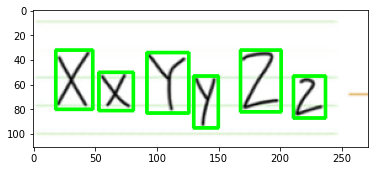

In [30]:
letter, image = get_letters("x.jpg", model, LB)
word = get_word(letter)
print(word)
plt.imshow(image)
plt.show()


1/1 [==============================] - 0s 15ms/step
SSN


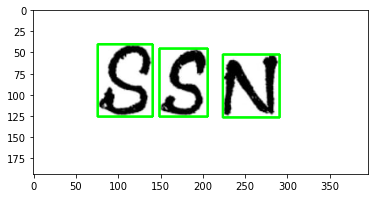

In [40]:
letter, image = get_letters("snn.jpg", model, LB)
word = get_word(letter)
print(word)
plt.imshow(image)
plt.show()